# What is Churn Rate?
The churn rate is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate.
### INTRODUCTION
Subscription Products often are the main source of revenue for companies across all industries. These products can come in the form of a one size fits all' overcompassing subscription, or in multi-level memberships. Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minimize customer churn (a.k.a. subscription cancellations). To retain their customers, these companies first need to identify behavioral patterns that act as catalyst in disengagement with the product.

<b> Market:</b> The target audience is the entirety of a company's subscription base. They are the ones companies want to keep. <br>
<b>Product:</b> The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.<br>
<b> Goal:</b> The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email reminders about the benefits of the product, especially focusing on features that are new or that the user has shown to value.
    
<b> BUSINESS CHALLENGE </b>
In this Case Study we will be working for a fin-tech company that provides a subscription product to its users, which allows them to manage their bank accounts (savings accounts, credit cards, etc), provides them with personalized coupons, informs them of the latest low-APR loans available in the market, and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health, etc).
We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. These features can increase the engagement and interest of our users towards the product.<br>

<b> DATA </b>
By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the sign-up process. • Financial data can often be unreliable and delayed. As a result, companies can sometimes build their marketing models using only demographic data, and data related to finances handled through the product itself. Therefore, we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.<br>
<b> DATASET </b>
Mock-up dataset based on trends found in real world case studies; 27 000 instances and 30 features (40 after creating dummy variables of categorical ones)<br>

<b> Goal </b>
Predict which users are likely to churn, so that the company can focus on re-engaging these users with the product.

<strong> Description of each Columns </strong> <br>
<b> churn ------>  Target column. Whether the user subscribed/not </b>               
 1 user id ------> User identifier column. In this case the user has code
 2   age   ------> age of user                 
 3   housing  ------> Categorical var with 3 label: NA:Data not available O: Owner of house    R:  rented the house       
 4   credit_score ------> Credit score of user            
 5   deposits ------> No. of times money deposited         
 6   withdrawal  ------> how many times withdrawls             
 7   purchases_partners ------> purchases done with partner store
 8   purchases ------> how many purchases user has done outside partner    
 9   cc_taken ------> credit card taken         
 10  cc_recommended ------>  credit card recommended     
 11  cc_disliked ------>  credit card disliked         
 12  cc_liked  ------>  credit card liked            
 13  cc_application_begin ------> credit card application started  
 14  app_downloaded  ------>  App was downloaded in mobile        
 15  web_user ------>  The browser was used              
 16  app_web_user ------> Both App and Web browser used             
 17  ios_user ------> Apple phone user             
 18  android_user ------> Android phone user            
 19  registered_phones ------> Registrered number. If only one then col is populated with 0 as one phone number is required to ne registered      
 20  payment_type ------> Frequency user gets paid Bi-weekly/Semi/Weekly/Monthly/NA 
 21  waiting_4_loan ------> Loan is awaited       
 22  cancelled_loan  ------> Loan is cancelled          
 23  received_loan  ------>  Loan received         
 24  rejected_loan  ------> Loan rejected         
 25  zodiac_sign   ------> Zodiac sign of user           
 26  left_for_two_month_plus ----> whether user left for 2 months or plus and they returned, If person left for 2 months and then returned then 1 else 0
 27  left_for_one_month ------> whether user left for 1 month and came back next month  
 28  rewards_earned ------> Points that are earned       
 29  reward_rate  ------>  rate of being rewarded        
 30  is_referred ------> Came through referal. Used some referal code.         

# Importing all the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df = pd.read_csv('churn_data.csv')

In [34]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [35]:
# Checking the balance in dataset

df.churn.value_counts()

0    15826
1    11174
Name: churn, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [37]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [38]:
# Checking for null values
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

<strong> 
age --> it has 4 NA so we drom the NA rows<br>
credit_score---> it has lot of NA so we Drop the entire Column<br>
rewards_earned---> it has lot of NA so we Drop the entire Column

In [39]:
# dropping the NA Rows in age
df = df.dropna()

In [40]:
# dropping the  Columns  
df=df.drop(columns=['credit_score','rewards_earned'])

In [41]:
# Checking for null values after dropping those rows and columns
df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [42]:
# Checking for duplicate data
duplicate_rows_df = df[df.duplicated()]

In [43]:
duplicate_rows_df.shape

(573, 29)

In [44]:
df.shape

(17779, 29)

In [45]:
# Removing duplicate data
df1 = df.drop_duplicates()

In [46]:
duplicate_rows_df = df1[df1.duplicated()]

In [47]:
duplicate_rows_df.shape

(0, 29)

### Histogram for the numerical columns

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17206 entries, 1 to 26999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     17206 non-null  int64  
 1   churn                    17206 non-null  int64  
 2   age                      17206 non-null  float64
 3   housing                  17206 non-null  object 
 4   deposits                 17206 non-null  int64  
 5   withdrawal               17206 non-null  int64  
 6   purchases_partners       17206 non-null  int64  
 7   purchases                17206 non-null  int64  
 8   cc_taken                 17206 non-null  int64  
 9   cc_recommended           17206 non-null  int64  
 10  cc_disliked              17206 non-null  int64  
 11  cc_liked                 17206 non-null  int64  
 12  cc_application_begin     17206 non-null  int64  
 13  app_downloaded           17206 non-null  int64  
 14  web_user              

In [49]:
# housing and payment_type are categorical columns so remove that
# remove user column as that is only unique representation of all users
#remove churn column as that is the TAGERT column
df_numerical=df1.drop(columns=['housing','payment_type','user','churn'])

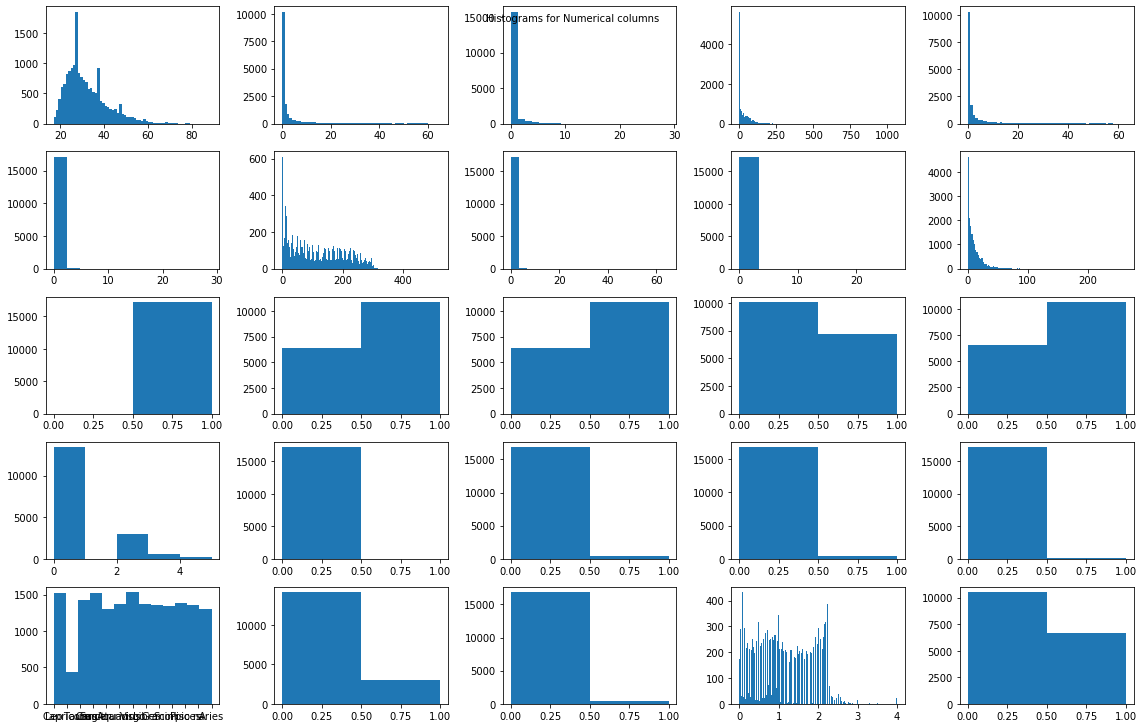

In [50]:
# Plotting the histogram for numerical columns

fig= plt.figure(figsize=(16,12))
plt.suptitle('Histograms for Numerical columns', fontsize=10)

for i in range(1, df_numerical.shape[1]+1):
    plt.subplot(6,5,i)
    vals= np.size(df_numerical.iloc[:,i-1].unique())
    plt.hist(df_numerical.iloc[:,i-1], bins=vals)
plt.tight_layout()

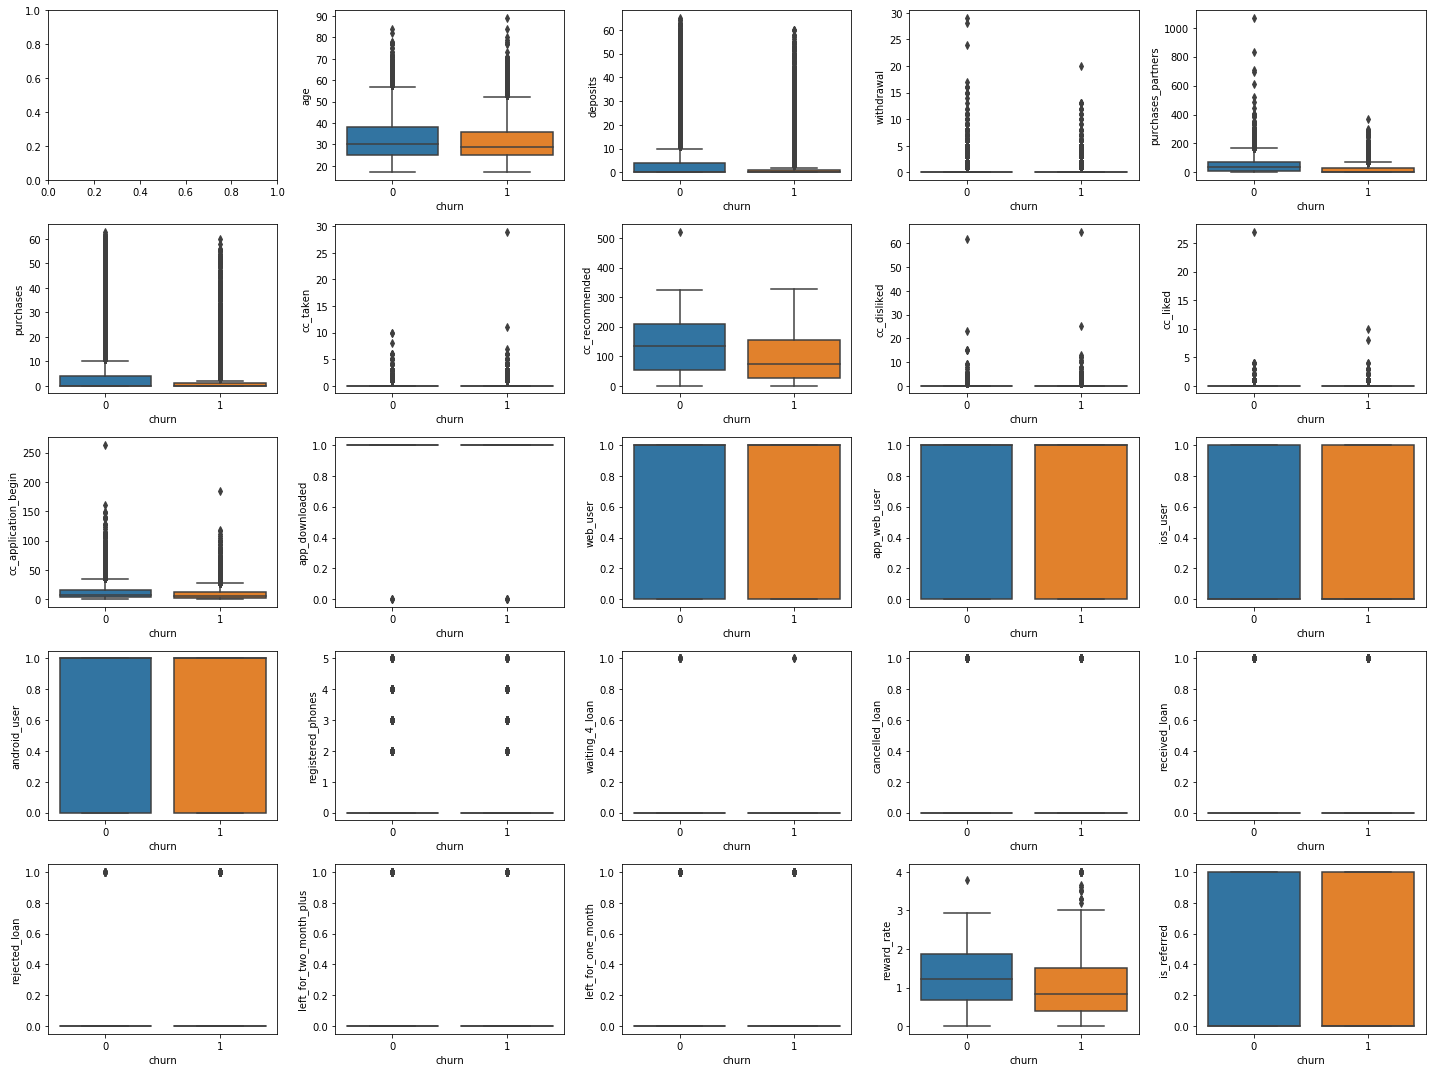

In [51]:
# Box plot
df_hist =df1.drop(columns=['housing','payment_type','user','zodiac_sign'])
fig, axes = plt.subplots(5, 5, figsize = (20,15))
axes = axes.flatten()

for i in range(1,len(df_hist.columns)):
    sns.boxplot(x="churn", y=df_hist.iloc[:,i], data=df_hist, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [52]:
# Dropping the no input given columns
df_hist.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

In [53]:
df_new_data = df1.drop(columns=['withdrawal','cc_taken','cc_disliked','cc_liked','app_downloaded','web_user','app_web_user',
                                'ios_user','android_user','registered_phones',
                                'waiting_4_loan','cancelled_loan','received_loan', 'rejected_loan','left_for_two_month_plus',
                                'left_for_one_month','is_referred'])

In [54]:
df_new_data.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'purchases_partners',
       'purchases', 'cc_recommended', 'cc_application_begin', 'payment_type',
       'zodiac_sign', 'reward_rate'],
      dtype='object')

## One Hot encoding
<strong> Categorical Variable Handling
    
    Dummy variable will create correlation problem. So remove correlation

In [55]:
df_new_data.housing.value_counts()

R     8715
na    6770
O     1721
Name: housing, dtype: int64

In [56]:
# Using pandas.get_dummies
 
df_new_data = pd.get_dummies(df_new_data)

In [57]:
# check the columns if the categorical values are spread
df_new_data.columns

Index(['user', 'churn', 'age', 'deposits', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'reward_rate', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [58]:
# removing the columns to remove corelation problem
df_new_data = df_new_data.drop(columns=['housing_na',
                                       'payment_type_na',
                                       'zodiac_sign_na'])

In [59]:
df_new_data.columns

Index(['user', 'churn', 'age', 'deposits', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'reward_rate', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

### creating a new csv for use

In [60]:
df_new_data.to_csv('new_ChurnData.csv',index=False)